# INF6804 - Vision par ordinateur
## Hiver 2021 - TP1 - Description et comparaison de regions d’interet
### Membres de l'équipe
    - Pierre-Luc Chartier - 1805679
    - Marc-Olivier Belanger - 1840713


## Directives de remise
Remise sur moodle. Une version du code et rapport.

Remise avant le 15 fevrier 2021, 17h00. Tout travail en retard sera pénalisé.

In [1]:
import cv2
import json
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Partie 1: Techniques de manipulation d'image

## Section 1 Manipulation et extraction des regions d'interets

Importation des images

In [10]:
list_keys = ['airplanes', 'bicycle', 'highway', 'road','skate1', 'skate2', 'ski',  'tree']
dict_images = {}
for it in list_keys:
    filename = 'Data/part1/images/' + it + '.jpg'
    dict_images[it] = cv2.imread(filename)[:,:,::-1]
    
with open('Data/part1/gt.json') as f:
    data = json.load(f)

list_annotations = data['annotations']
print(list_annotations)

[{'image': 'airplanes', 'bbox': [385.66, 196.95, 120.0, 80.97], 'category_id': 5}, {'image': 'airplanes', 'bbox': [333.91, 301.39, 126.73, 78.3], 'category_id': 5}, {'image': 'bicycle', 'bbox': [225.82, 44.47, 379.62, 372.6], 'category_id': 2}, {'image': 'bicycle', 'bbox': [133.74, 118.54, 101.25, 235.95], 'category_id': 11}, {'image': 'highway', 'bbox': [161.4, 121.13, 240.68, 195.79], 'category_id': 8}, {'image': 'highway', 'bbox': [276.06, 70.63, 90.56, 53.88], 'category_id': 8}, {'image': 'road', 'bbox': [383.36, 278.27, 167.51, 117.05], 'category_id': 3}, {'image': 'road', 'bbox': [34.44, 41.97, 229.24, 360.54], 'category_id': 8}, {'image': 'road', 'bbox': [255.57, 152.59, 175.03, 205.1], 'category_id': 8}, {'image': 'road', 'bbox': [430.64, 293.73, 35.64, 23.56], 'category_id': 1}, {'image': 'road', 'bbox': [523.71, 33.79, 115.56, 435.92], 'category_id': 8}, {'image': 'skate1', 'bbox': [290.88, 151.47, 107.58, 123.06], 'category_id': 18}, {'image': 'skate1', 'bbox': [120.04, 68.1

Definitions des regions d'interets

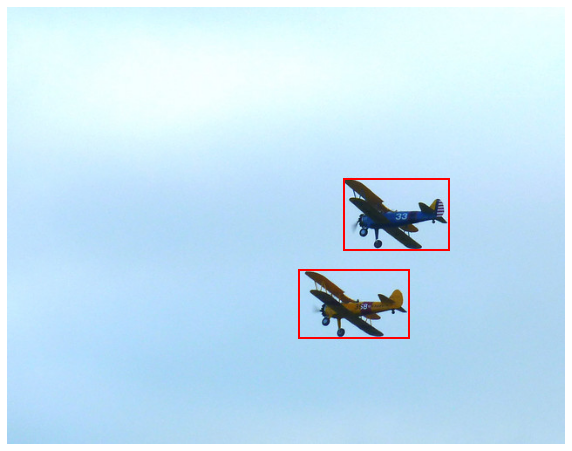

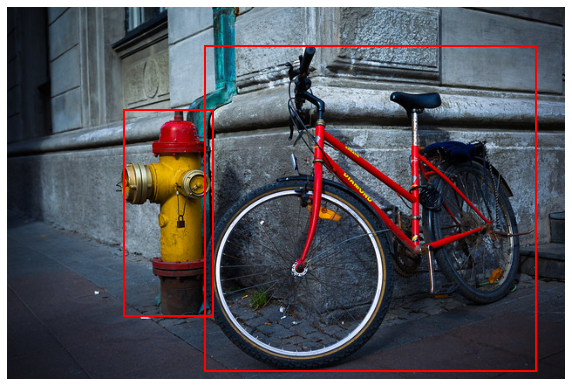

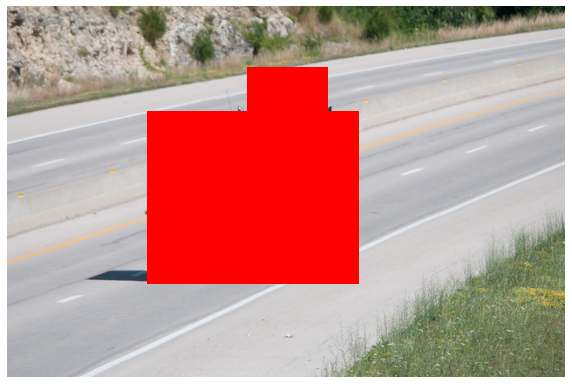

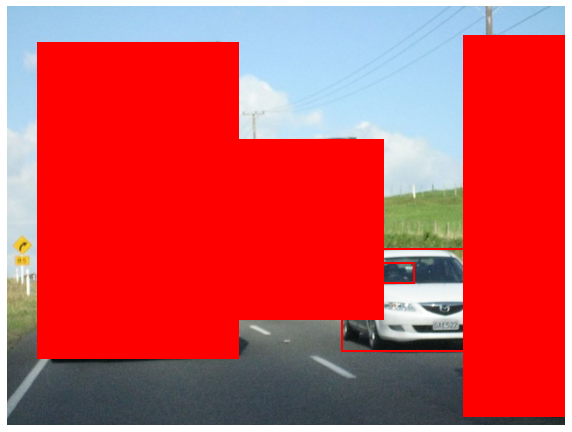

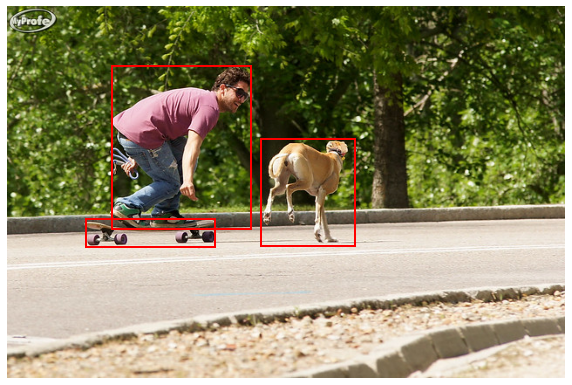

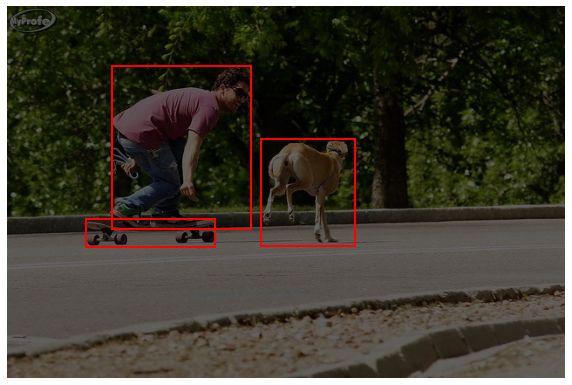

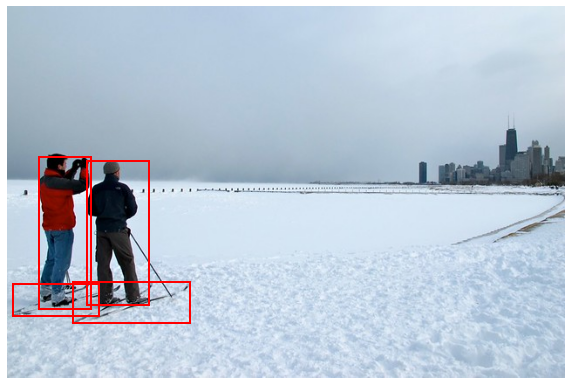

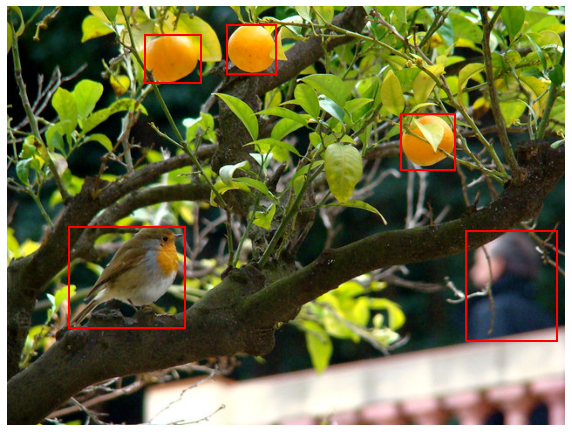

In [11]:
for img in list_keys:
    fig,ax = plt.subplots(1,figsize=(10, 10))
    ax.imshow(dict_images[img])
    for it in list_annotations:
        if it['image']==img:
            bbox = it['bbox']
            rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2,edgecolor='r',facecolor='none')
            if it['category_id'] == 8:
                rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2,edgecolor='r',facecolor='r')
            ax.add_patch(rect)
    plt.axis('off')
    plt.show()
      

## Section 2: Description des regions d’interet par histogramme de couleurs RGB

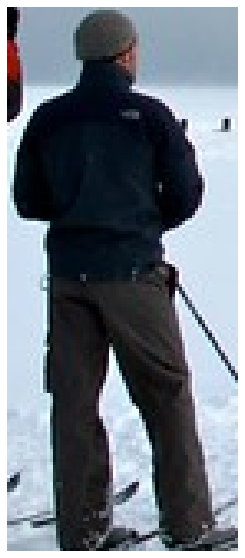

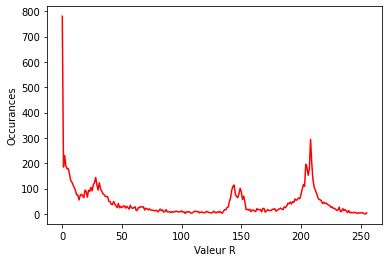

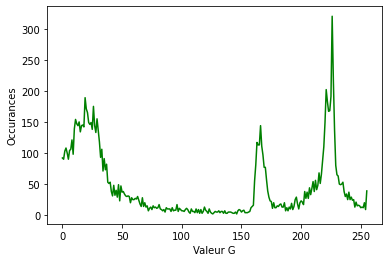

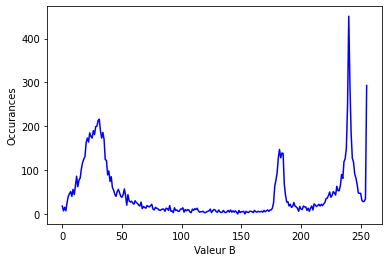

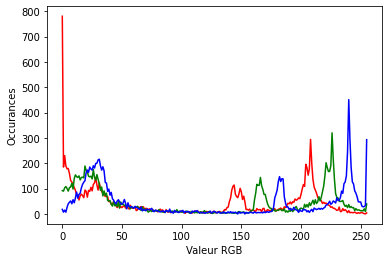

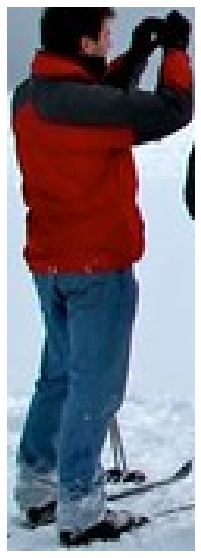

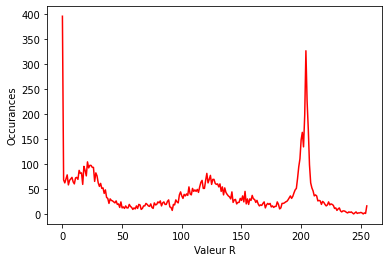

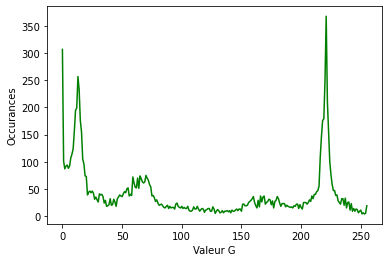

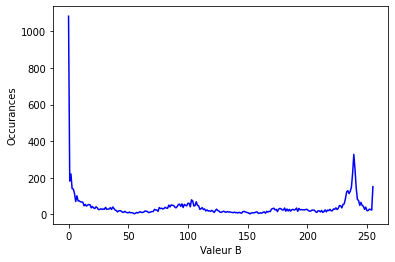

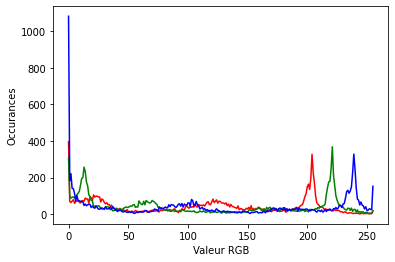

In [12]:
key_id=6
for it in list_annotations:
    if (it['image']==list_keys[key_id]) & (it['category_id']==1):
        fig,ax = plt.subplots(1,figsize=(10, 10))
        bbox = it['bbox']
        crop_img = dict_images[list_keys[key_id]][int(bbox[1]):int(bbox[1])+int(bbox[3]), int(bbox[0]):int(bbox[0])+int(bbox[2])]
        ax.imshow(crop_img)
        plt.axis('off')
        plt.show()
        hist = cv2.calcHist([crop_img],[0],None,[256],[0,256])
        plt.plot(hist,'r')
        plt.xlabel("Valeur R")
        plt.ylabel("Occurances")
        plt.show()
        hist = cv2.calcHist([crop_img],[1],None,[256],[0,256])
        plt.plot(hist,'g')
        plt.xlabel("Valeur G")
        plt.ylabel("Occurances")
        plt.show()
        hist = cv2.calcHist([crop_img],[2],None,[256],[0,256])
        plt.plot(hist,'b')
        plt.xlabel("Valeur B")
        plt.ylabel("Occurances")
        plt.show()
        hist = cv2.calcHist([crop_img],[0],None,[256],[0,256])
        plt.plot(hist,'r')
        hist = cv2.calcHist([crop_img],[1],None,[256],[0,256])
        plt.plot(hist,'g')
        hist = cv2.calcHist([crop_img],[2],None,[256],[0,256])
        plt.plot(hist,'b')
        plt.xlabel("Valeur RGB")
        plt.ylabel("Occurances")
        plt.show()

## Section 3: Description des regions d’interet par histogramme de couleurs HSV

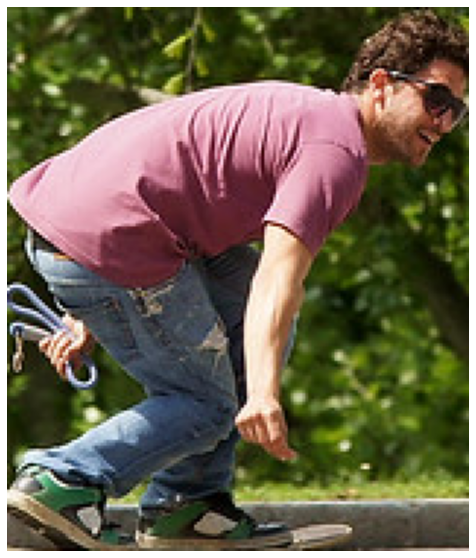

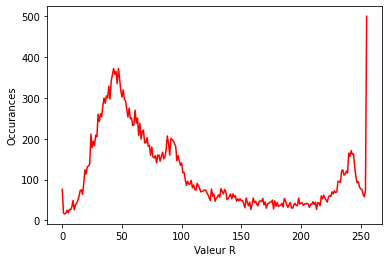

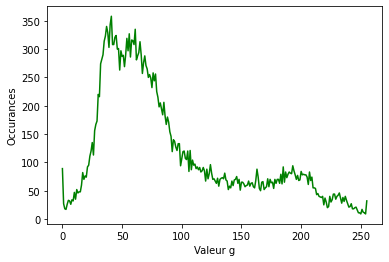

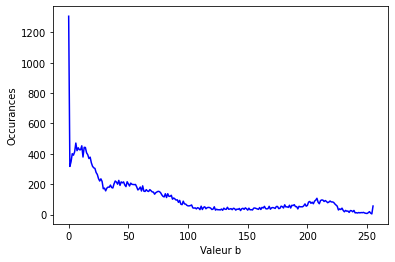

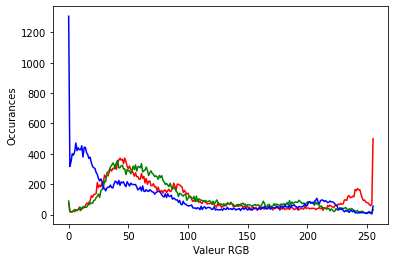

In [13]:
key_id=4
for it in list_annotations:
    if (it['image']==list_keys[key_id]) & (it['category_id']==1):
        fig,ax = plt.subplots(1,figsize=(10, 10))
        bbox = it['bbox']
        crop_img = dict_images[list_keys[key_id]][int(bbox[1]):int(bbox[1])+int(bbox[3]), int(bbox[0]):int(bbox[0])+int(bbox[2])]
        ax.imshow(crop_img)
        plt.axis('off')
        plt.show()
        hist = cv2.calcHist([crop_img],[0],None,[256],[0,256])
        plt.plot(hist,'r')
        plt.xlabel("Valeur R")
        plt.ylabel("Occurances")
        plt.show()
        hist = cv2.calcHist([crop_img],[1],None,[256],[0,256])
        plt.plot(hist,'g')
        plt.xlabel("Valeur g")
        plt.ylabel("Occurances")
        plt.show()
        hist = cv2.calcHist([crop_img],[2],None,[256],[0,256])
        plt.plot(hist,'b')
        plt.xlabel("Valeur b")
        plt.ylabel("Occurances")
        plt.show()
        hist = cv2.calcHist([crop_img],[0],None,[256],[0,256])
        plt.plot(hist,'r')
        hist = cv2.calcHist([crop_img],[1],None,[256],[0,256])
        plt.plot(hist,'g')
        hist = cv2.calcHist([crop_img],[2],None,[256],[0,256])
        plt.plot(hist,'b')
        plt.xlabel("Valeur RGB")
        plt.ylabel("Occurances")
        plt.show()

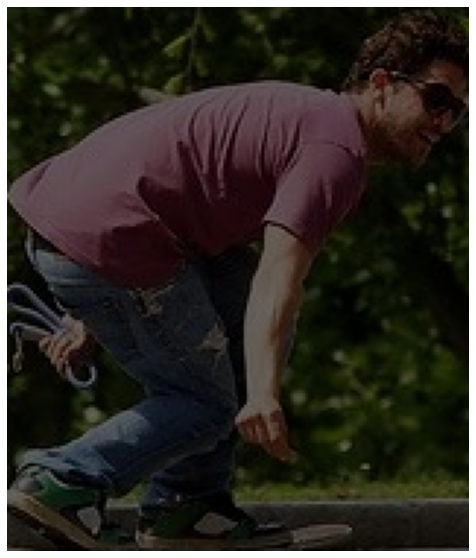

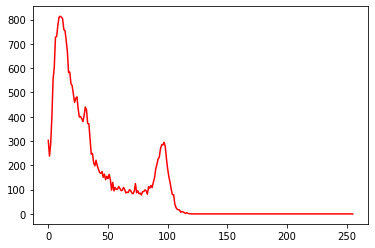

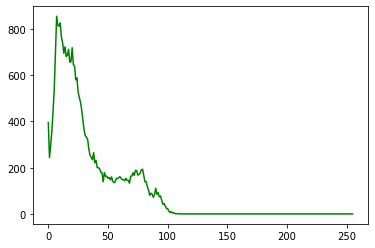

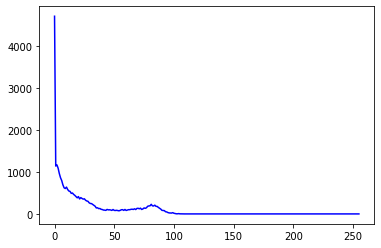

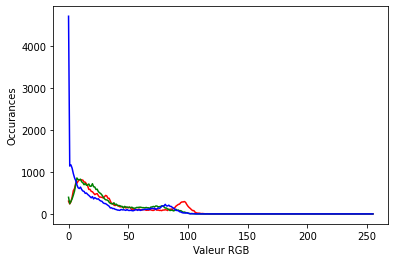

In [14]:
key_id=5
for it in list_annotations:
    if (it['image']==list_keys[key_id]) & (it['category_id']==1):
        fig,ax = plt.subplots(1,figsize=(10, 10))
        bbox = it['bbox']
        crop_img = dict_images[list_keys[key_id]][int(bbox[1]):int(bbox[1])+int(bbox[3]), int(bbox[0]):int(bbox[0])+int(bbox[2])]
        ax.imshow(crop_img)
        plt.axis('off')
        plt.show()
        hist = cv2.calcHist([crop_img],[0],None,[256],[0,256])
        plt.plot(hist,'r')
        plt.show()
        hist = cv2.calcHist([crop_img],[1],None,[256],[0,256])
        plt.plot(hist,'g')
        plt.show()
        hist = cv2.calcHist([crop_img],[2],None,[256],[0,256])
        plt.plot(hist,'b')
        plt.show()
        hist = cv2.calcHist([crop_img],[0],None,[256],[0,256])
        plt.plot(hist,'r')
        hist = cv2.calcHist([crop_img],[1],None,[256],[0,256])
        plt.plot(hist,'g')
        hist = cv2.calcHist([crop_img],[2],None,[256],[0,256])
        plt.plot(hist,'b')
        plt.xlabel("Valeur RGB")
        plt.ylabel("Occurances")
        plt.show()

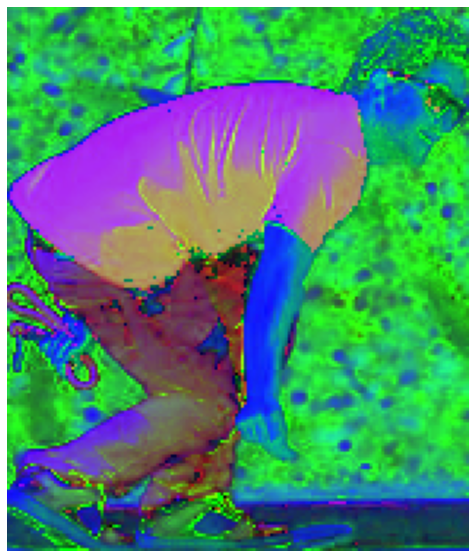

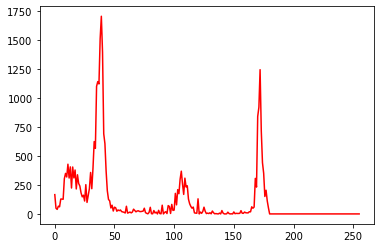

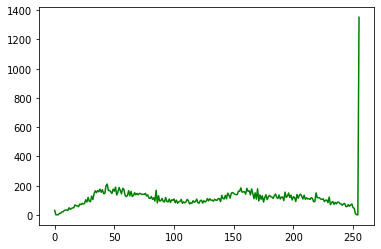

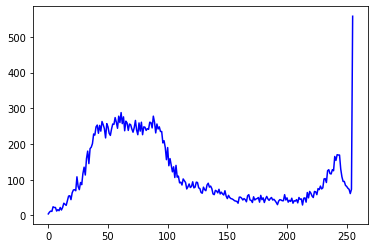

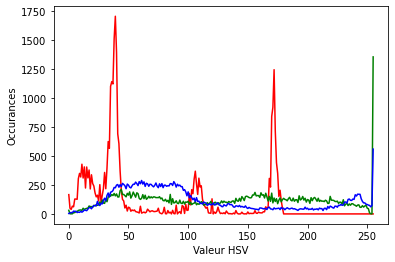

In [15]:
key_id=4
for it in list_annotations:
    if (it['image']==list_keys[key_id]) & (it['category_id']==1):
        fig,ax = plt.subplots(1,figsize=(10, 10))
        bbox = it['bbox']
        crop_img = dict_images[list_keys[key_id]][int(bbox[1]):int(bbox[1])+int(bbox[3]), int(bbox[0]):int(bbox[0])+int(bbox[2])]
        crop_img = crop_img[:,:,::-1] 
        hsv = cv2.cvtColor(crop_img, cv2.COLOR_BGR2HSV)
        ax.imshow(hsv)
        plt.axis('off')
        plt.show()
        hist = cv2.calcHist([hsv],[0],None,[256],[0,256])
        plt.plot(hist,'r')
        plt.show()
        hist = cv2.calcHist([hsv],[1],None,[256],[0,256])
        plt.plot(hist,'g')
        plt.show()
        hist = cv2.calcHist([hsv],[2],None,[256],[0,256])
        plt.plot(hist,'b')
        plt.show()
        hist = cv2.calcHist([hsv],[0],None,[256],[0,256])
        plt.plot(hist,'r')
        hist = cv2.calcHist([hsv],[1],None,[256],[0,256])
        plt.plot(hist,'g')
        hist = cv2.calcHist([hsv],[2],None,[256],[0,256])
        plt.plot(hist,'b')
        plt.xlabel("Valeur HSV")
        plt.ylabel("Occurances")
        plt.show()

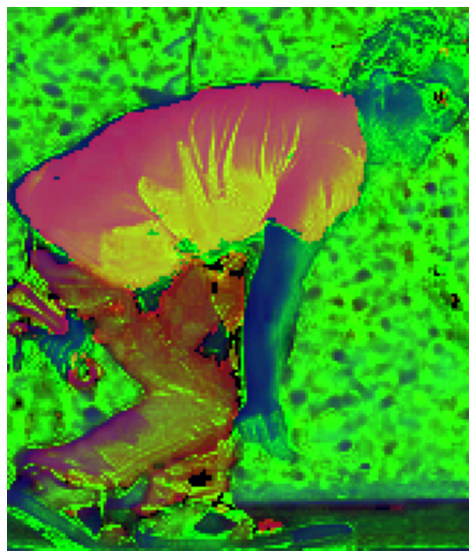

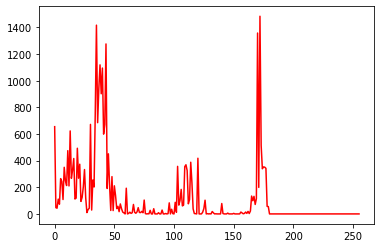

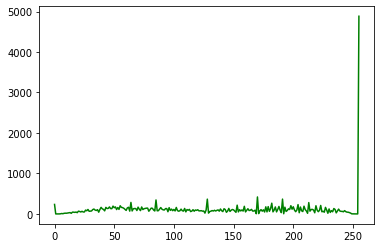

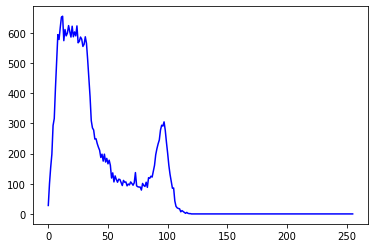

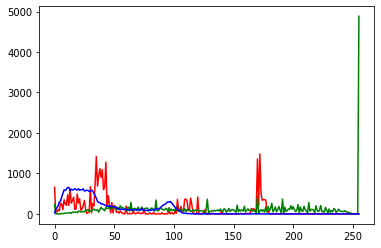

In [19]:
key_id=5
for it in list_annotations:
    if (it['image']==list_keys[key_id]) & (it['category_id']==1):
        fig,ax = plt.subplots(1,figsize=(10, 10))
        bbox = it['bbox']
        crop_img = dict_images[list_keys[key_id]][int(bbox[1]):int(bbox[1])+int(bbox[3]), int(bbox[0]):int(bbox[0])+int(bbox[2])]
        crop_img = crop_img[:,:,::-1] 
        hsv = cv2.cvtColor(crop_img, cv2.COLOR_BGR2HSV)
        ax.imshow(hsv)
        plt.axis('off')
        plt.show()
        hist = cv2.calcHist([hsv],[0],None,[256],[0,256])
        plt.plot(hist,'r')
        plt.show()
        hist = cv2.calcHist([hsv],[1],None,[256],[0,256])
        plt.plot(hist,'g')
        plt.show()
        hist = cv2.calcHist([hsv],[2],None,[256],[0,256])
        plt.plot(hist,'b')
        plt.show()
        hist = cv2.calcHist([hsv],[0],None,[256],[0,256])
        plt.plot(hist,'r')
        hist = cv2.calcHist([hsv],[1],None,[256],[0,256])
        plt.plot(hist,'g')
        hist = cv2.calcHist([hsv],[2],None,[256],[0,256])
        plt.plot(hist,'b')
        plt.show()

# Partie 2: Comparaison de 2 methodes de descriptions d'image

Importation des images requêtes et du database

In [20]:
#query image dictionnary
list_keys = ['airplane', 'ball', 'car','cat', 'dolphin','face','lotus', 'strawberry']
dict_query = {}
for it in list_keys:
    filename = 'Data/part2/' + it + '_query.jpg'
    dict_query[it] = cv2.imread(filename)[:,:,::-1] 

In [23]:
#database image dictionnary
dict_database = {}
for it in list_keys:
    for id in range(1,6):
        filename = 'Data/part2/database/' + it + '_' + str(id)+ '.jpg'
        keyname = 'Data/part2/database/' + it + '_' + str(id)
        dict_database[keyname] = cv2.imread(filename)[:,:,::-1]

## Section 1: Methode histogramme de couleur version 1



*   etape 1:creer histogramme de couleur 12bin pour toutes les images du database pour chaque channel (fonction construire image)
*   etape 2:convertir une image requête
*   etape 3: comparer avec une norme



In [24]:
def Rgb_histo(nb_bin,image):
    v_r = cv2.calcHist([image],[0],None,[nb_bin],[0,256])
    v_g = cv2.calcHist([image],[1],None,[nb_bin],[0,256])
    v_b = cv2.calcHist([image],[2],None,[nb_bin],[0,256])
    #normalisation
    v_r=v_r/np.linalg.norm(v_r)
    v_g=v_g/np.linalg.norm(v_g)
    v_b=v_b/np.linalg.norm(v_b)
    return [v_r,v_g,v_b]

In [25]:
#histogramme database
nb_bin=12;
dict_database_rgb = {}
for it in list_keys:
    for id in range(1,6):
        keyname = 'Data/part2/database/' + it + '_' + str(id)
        dict_database_rgb[keyname]=Rgb_histo(nb_bin,dict_database[keyname])

In [26]:
#histogramme requete
dict_query_rgb = {}
for it in list_keys:
    for id in range(1,6):
        dict_query_rgb[it]=Rgb_histo(nb_bin,dict_query[it])

In [31]:
def Compare_histo_norm_l2(requete_keyname):
    dict_classement={};
    for it in list_keys:
        for id in range(1,6):
            keyname = 'Data/part2/database/' + it + '_' + str(id)
            norm_r=np.linalg.norm(dict_query_rgb[requete_keyname][0]-dict_database_rgb[keyname][0])
            norm_g=np.linalg.norm(dict_query_rgb[requete_keyname][1]-dict_database_rgb[keyname][1])
            norm_b=np.linalg.norm(dict_query_rgb[requete_keyname][2]-dict_database_rgb[keyname][2])
            dict_classement[keyname]=(norm_r+norm_g+ norm_b)/3
    return sorted(dict_classement.items(), key=lambda item: item[1])

In [35]:
def Compare_histo_norm_intersection(requete_keyname):
    dict_classement={};
    for it in list_keys:
        for id in range(1,6):
            keyname = 'Data/part2/database/' + it + '_' + str(id)
            norme=[]
        for color in range(0,3):
            somme_tot=np.sum(dict_query_rgb[requete_keyname][color])
            somme=0
            for bin in range(0,nb_bin):
                somme += min(dict_query_rgb[requete_keyname][color][bin], dict_database_rgb[keyname][color][bin])
            norme.append(somme/somme_tot)
        dict_classement[keyname]=np.sum(norme)/len(norme)
    return sorted(dict_classement.items(), key=lambda item: item[1],reverse=True)

In [36]:
Compare_histo_norm_l2('lotus')

[('Data/part2/database/ball_2', 0.21138219038645426),
 ('Data/part2/database/cat_4', 0.3819377024968465),
 ('Data/part2/database/cat_5', 0.38347554206848145),
 ('Data/part2/database/strawberry_4', 0.39196252822875977),
 ('Data/part2/database/cat_2', 0.6752984523773193),
 ('Data/part2/database/strawberry_1', 0.7338847319285074),
 ('Data/part2/database/dolphin_1', 0.7611444791158041),
 ('Data/part2/database/dolphin_4', 0.8635862668355306),
 ('Data/part2/database/ball_5', 0.9561312993367513),
 ('Data/part2/database/airplane_4', 0.9719831943511963),
 ('Data/part2/database/airplane_2', 0.9921407699584961),
 ('Data/part2/database/strawberry_2', 1.0064244270324707),
 ('Data/part2/database/ball_1', 1.0067858695983887),
 ('Data/part2/database/face_3', 1.0411403973897297),
 ('Data/part2/database/strawberry_5', 1.0526727040608723),
 ('Data/part2/database/strawberry_3', 1.0621278285980225),
 ('Data/part2/database/lotus_1', 1.0820871988932292),
 ('Data/part2/database/dolphin_3', 1.1198867162068684)

In [51]:
Compare_histo_norm_intersection('strawberry')

[('Data/part2/database/cat_5', 0.6995680332183838),
 ('Data/part2/database/ball_5', 0.5019526481628418),
 ('Data/part2/database/strawberry_5', 0.3964669704437256),
 ('Data/part2/database/face_5', 0.33417145411173504),
 ('Data/part2/database/lotus_5', 0.2972911596298218),
 ('Data/part2/database/car_5', 0.2724908192952474),
 ('Data/part2/database/airplane_5', 0.2507842183113098),
 ('Data/part2/database/dolphin_5', 0.1807787815729777)]

## Section 2: Méthode extraction de vecteurs ORB

### Appariement naïf de descripteurs ORB

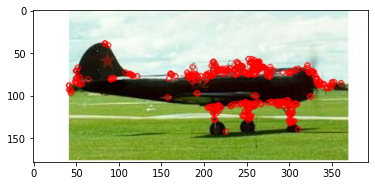

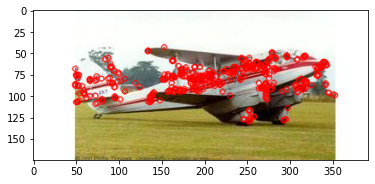

In [48]:
orb = cv2.ORB_create()

img1 = cv2.imread('Data/part2/airplane_query.jpg')[:,:,::-1]
img2 = cv2.imread('Data/part2/database/airplane_5.jpg')[:,:,::-1]

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

img = cv2.drawKeypoints(img1,kp1,color=(255,0,0), outImage=None)
plt.imshow(img)
plt.show()

img = cv2.drawKeypoints(img2,kp2,color=(255,0,0), outImage=None)
plt.imshow(img)
plt.show()

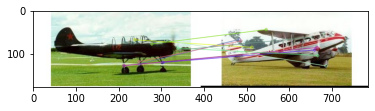

In [50]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], flags=2, outImg=None)

plt.imshow(img)
plt.show()